In [65]:
import pandas, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Question 1:
Use Pandas to load the data from Wage.csv and create a scatter plot comparing wage to age. 
    Does there appear to be a relationship?

Answer:
There does not appear to be a relationship regarding wages and age. 
The plots are so scattered that it seems age and wage do not relate as much. 
However, there are a few cases where those who make 250+ are between the 
ages of 30 and 70.



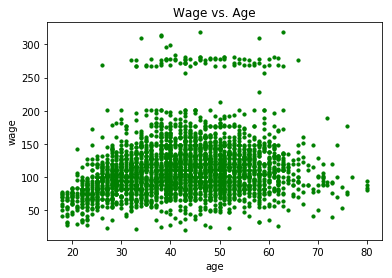

In [66]:
print("""Question 1:\nUse Pandas to load the data from Wage.csv and create a scatter plot comparing wage to age. 
    Does there appear to be a relationship?
""")

data = pandas.read_csv('Wage.csv')
df = pandas.DataFrame(data, columns=['age', 'wage'])

x = data['age'][:,None]
y = data['wage'][:,None]
plt.title("Wage vs. Age")

plt.scatter(x, y, c='green', s=10)
plt.xlabel("age")
plt.ylabel("wage")

print('''Answer:\nThere does not appear to be a relationship regarding wages and age. 
The plots are so scattered that it seems age and wage do not relate as much. 
However, there are a few cases where those who make 250+ are between the 
ages of 30 and 70.
''')

In [67]:
print('''Question2:\nUse sklearn.model_selection.train_test_split to set aside 20% of the data as a test set.
''')

# Split the training data of age and wage by 20% for the testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


Question2:
Use sklearn.model_selection.train_test_split to set aside 20% of the data as a test set.



Question 3/4: 
 Use sklearn.linear_model.LinearRegression to fit wage as a function of age. 
         List the coefficients of the model, and plot the line against the scatterplot from 
         experiment (1) above.
         
         Predict wages for each of the items in your test set, and score them against the targets. 
         What does R2 tell you about how well the model fits the data?

Coefficient(s): [[0.73941741]] 

R^2 score: 0.026238249800684232
Based on our low level of correlation on our R^2 score,
this regression model is not a suitable fit.


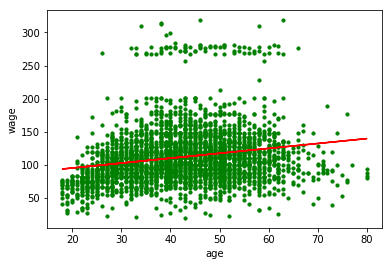

In [68]:
from sklearn.metrics import r2_score
print('''Question 3/4: \n Use sklearn.linear_model.LinearRegression to fit wage as a function of age. 
         List the coefficients of the model, and plot the line against the scatterplot from 
         experiment (1) above.
         
         Predict wages for each of the items in your test set, and score them against the targets. 
         What does R2 tell you about how well the model fits the data?''')

reg = LinearRegression()

# Using sklearn.linear_model.LinearRegression to fit wage as a function of age.
reg.fit(x_train, y_train)

# Predict the value
y_pred = reg.predict(x_test)

# Plot line against the scatterplot from question 1
plt.scatter(x, y, c='green', s=10)
plt.xlabel("age")
plt.ylabel("wage")
plt.plot(x_test, y_pred, color='r')

#Listing the coefficients of the model
print("\nCoefficient(s):", reg.coef_, "\n")

print("R^2 score:", r2_score(y_test, y_pred))
#Doesnt work: score not defined: print("R^2 score_test:", score(y_test, y_pred, sample_weight=None))
print('''Based on our low level of correlation on our R^2 score,
this regression model is not a suitable fit.''')



Question 5: 
Use sklearn.preprocessing. PolynomialFeatures along with LinearRegression to fit a 
4th order polynomial to the same data. Plot the resulting polynomial, and compare R2 to the previous model.
R^2 score: 0.07649464153415342
The R^2 score of the polynomial compared to the
score of the linear regression model is higher, allowing
more correlation with the data.


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.716972e-17
  overwrite_a=True).T


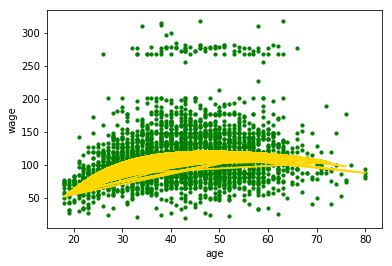

In [69]:
print('''Question 5: \nUse sklearn.preprocessing. PolynomialFeatures along with LinearRegression to fit a 
4th order polynomial to the same data. Plot the resulting polynomial, and compare R2 to the previous model.''')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Set the 4th order polynomial function
polynomial = PolynomialFeatures(degree=4)

# Create a model for the 4th order polynomial and linear regression
model = make_pipeline(polynomial, Ridge())

# DO WE SORT HERE???? This affects how the line graph looks
# x_train.sort(axis=0)

# Train the model
model.fit(x_train, y_train)

# Predict the value
y_pred = model.predict(x_test)

# Plot the line
plt.plot(x_test, y_pred, color='gold')

# ???
print("R^2 score:", r2_score(y_test, y_pred))
print('''The R^2 score of the polynomial compared to the
score of the linear regression model is higher, allowing
more correlation with the data.''')

plt.scatter(x, y, c='green', s=10)
plt.xlabel("age")
plt.ylabel("wage")
plt.plot(x_test, y_pred, color='gold')






In [70]:
print('''Question 6: \nAdd L2 regularization by using sklearn.linear_model.Ridge with α = 0.1 to fit 
a 4th order polynomial. How do the coefficients compare to those in experiment (4) above? How does R2 compare?
''')
#α = 0.1
clf = Ridge(alpha=0.1)

clf.fit(x, y)


Question 6: 
Add L2 regularization by using sklearn.linear_model.Ridge with α = 0.1 to fit 
a 4th order polynomial. How do the coefficients compare to those in experiment (4) above? How does R2 compare?



Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
print('''Question 7:\n Use sklearn.linear_model.RidgeCV to find the best value for α across the range 0.001, 0.002, 0.004, 0.01, 
0.02, 0.04, 0.1, 0.2, 0.4, 1.0.''')
from sklearn.linear_model import RidgeCV

ridges = [[0.001], [0.002], [0.004], [0.01], [0.02], [0.04], [0.1], [0.2], [0.4], [1.0]]
best_val = 0
idx = 0
clf = 0

for i in range(len(ridges)):
    clf = RidgeCV(alphas=ridges[i]).fit(x, y)
    test_val = clf.score(x, y)
    if test_val > best_val:
        best_val = test_val
        idx = i

clf = RidgeCV(alphas=ridges[idx]).fit(x, y)

print("The best value for α across the range of 0.001, 0.002, 0.004, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0 is:\n",
     ridges[idx][0], "with a value of", clf.score(x, y))

#clf = RidgeCV(alphas=[0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0]).fit(x, y)
#clf.score(x, y) 
#print(clf.score(x, y))

Question 7:
 Use sklearn.linear_model.RidgeCV to find the best value for α across the range 0.001, 0.002, 0.004, 0.01, 
0.02, 0.04, 0.1, 0.2, 0.4, 1.0.
The best value for α across the range of 0.001, 0.002, 0.004, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0 is:
 0.01 with a value of 0.03827391463563212


In [72]:
print('''Question 8: Are there any other fields in the data that might be related to wage? 
Add at least one of these columns to your training and testing sets and see whether 
you can improve your predictions.''')

df = pandas.DataFrame(data, columns=['age', 'education', 'wage'])

x = data[['age', 'education']]

df_2 = pandas.get_dummies(df['education'])
df = pandas.DataFrame(data, columns=['age', 'wage'])
df = pandas.concat([df, df_2], axis=1)

# throws an error, waiting on buddy
x = df[['age','1. < HS Grad', '2. HS Grad', '3. Some College', '4. College Grad']]
y = df['wage']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model.fit(x_train, y_train)
print("R^2 Value:", model.score(X_test, y_test))


Question 8: Are there any other fields in the data that might be related to wage? 
Add at least one of these columns to your training and testing sets and see whether 
you can improve your predictions.


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.716972e-17
  overwrite_a=True).T


ValueError: X shape does not match training shape